In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
csvs = [i for i in os.listdir() if ('csv' in i) and ('ounds' not in i)]
pngs = [i for i in os.listdir() if ('png' in i) and ('ounds' not in i)]


In [3]:
def makeArr(string):
    df = pd.read_csv(string)
    return df[0:2], df.values[1:,:].astype(float)

In [9]:
csvArrs = {}
for name in csvs:
    _,csvArrs[name] = makeArr(name)
    print(_)

         x-axis               1              2               3
0        second            Volt           Volt          Ampere
1  -10.6200E-03  +3.3417086E+00  +527.6382E-03  +3.5427136E+00
         x-axis               1               2              3
0        second            Volt            Volt         Ampere
1  -10.6200E-03  -1.7336684E+00  -1.6834171E+00  -201.0050E-03
          x-axis                 1                 2                3
0         second              Volt              Volt           Ampere
1  -5.620000E-03  -8.291457351E+00  -1.457286444E+00  -402.010053E-03
         x-axis               1              2               3
0        second            Volt           Volt          Ampere
1  -10.6200E-03  +2.0100503E+00  -603.0151E-03  -3.6934674E+00
         x-axis               1              2               3
0        second            Volt           Volt          Ampere
1  -10.6200E-03  +4.2211056E+00  +201.0050E-03  +4.0201005E+00
         x-axis               1   

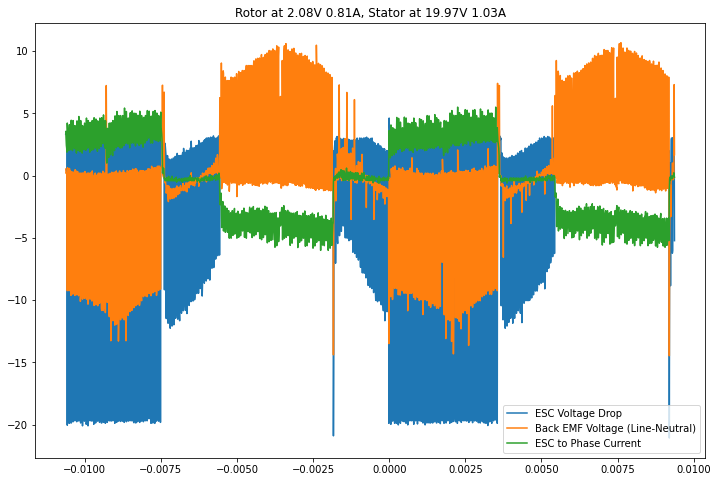

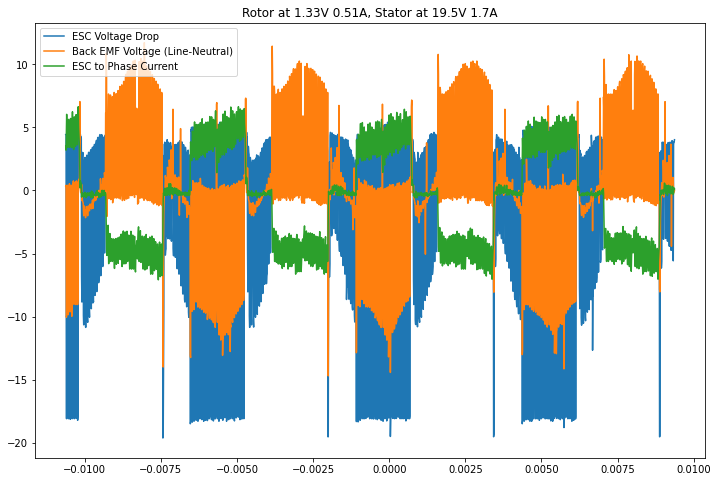

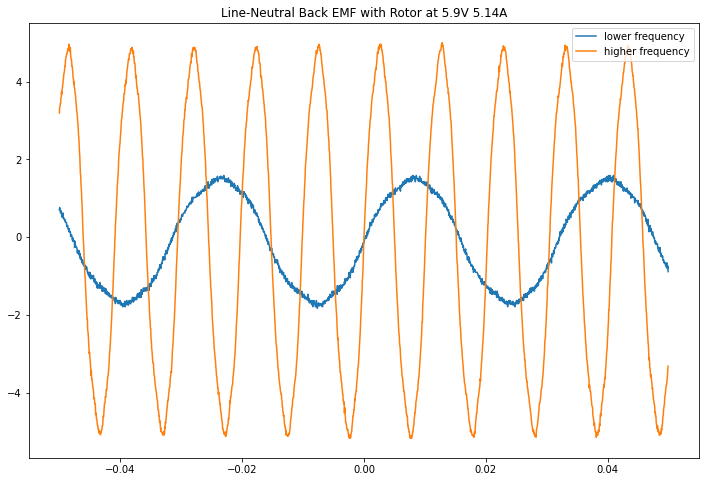

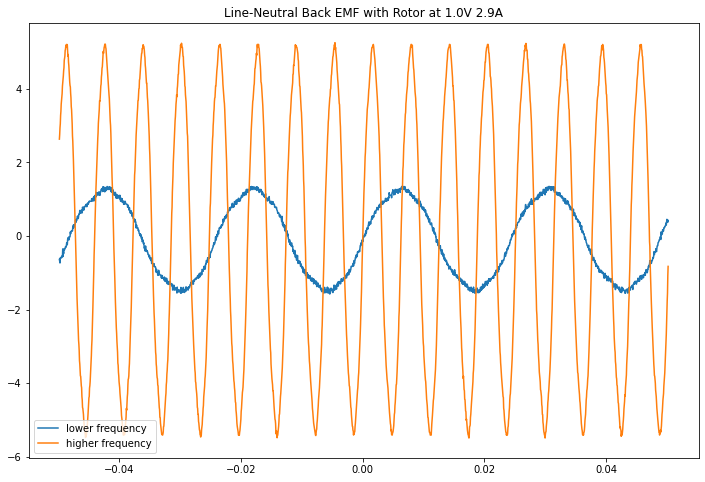

In [17]:
m = csvArrs['af1.csv']
plt.figure(figsize=(12,8))
plt.plot(m[:,0], m[:,1])
plt.plot(m[:,0], m[:,2])
plt.plot(m[:,0], m[:,3])
plt.legend(['ESC Voltage Drop', 'Back EMF Voltage (Line-Neutral)','ESC to Phase Current'])
plt.title('Rotor at 2.08V 0.81A, Stator at 19.97V 1.03A')
plt.savefig('motor1.png')
plt.show()


m = csvArrs['af19.csv']
plt.figure(figsize=(12,8))
plt.plot(m[:,0], m[:,1])
plt.plot(m[:,0], m[:,2])
plt.plot(m[:,0], m[:,3])
plt.legend(['ESC Voltage Drop', 'Back EMF Voltage (Line-Neutral)','ESC to Phase Current'])
plt.title('Rotor at 1.33V 0.51A, Stator at 19.5V 1.7A')
plt.savefig('motor2.png')
plt.show()

m1 = csvArrs['gen17.csv']
m2 = csvArrs['gen23.csv']
plt.figure(figsize=(12,8))
plt.plot(m1[:,0], m1[:,1])
plt.plot(m2[:,0], m2[:,1])
plt.legend(['lower frequency', 'higher frequency'])
plt.title('Line-Neutral Back EMF with Rotor at 5.9V 5.14A')
plt.savefig('gen1.png')
plt.show()


m1 = csvArrs['gen33.csv']
m2 = csvArrs['gen39.csv']
plt.figure(figsize=(12,8))
plt.plot(m1[:,0], m1[:,1])
plt.plot(m2[:,0], m2[:,1])
plt.legend(['lower frequency', 'higher frequency'])
plt.title('Line-Neutral Back EMF with Rotor at 1.0V 2.9A')
plt.savefig('gen2.png')
plt.show()


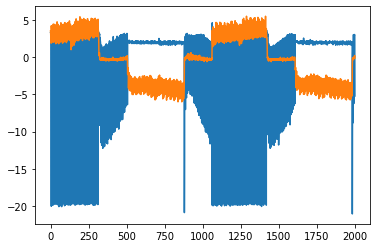

bounds?530,780


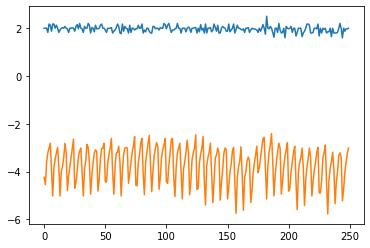

ok?1


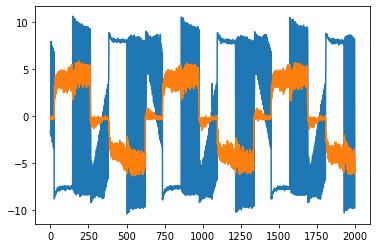

bounds?1480,1525


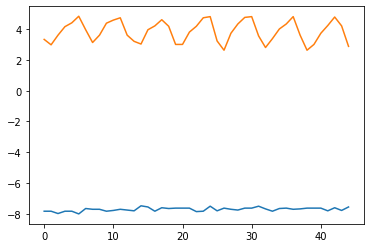

ok?1


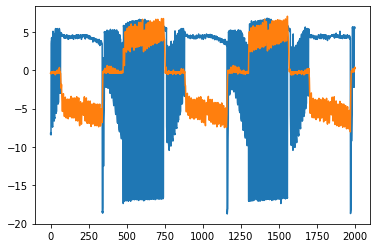

bounds?900,1080


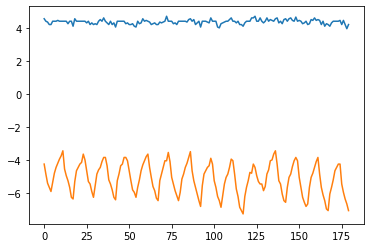

ok?1


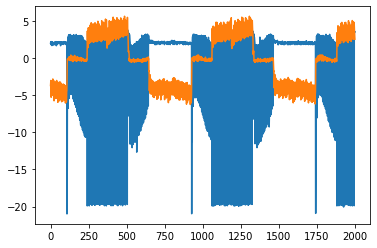

bounds?650,850


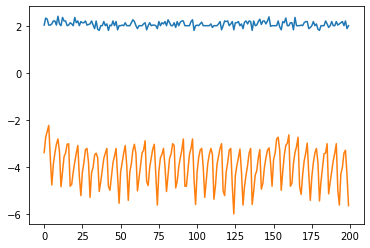

ok?1


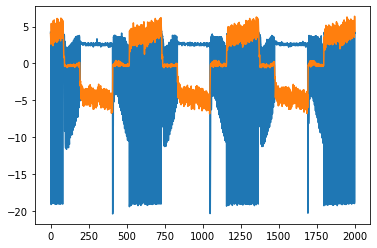

bounds?220,280


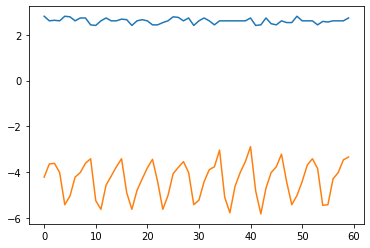

ok?1


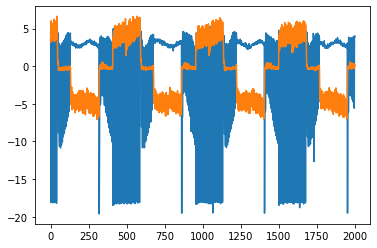

bounds?200,255


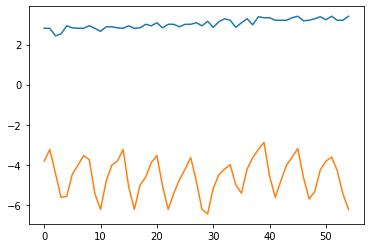

ok?1


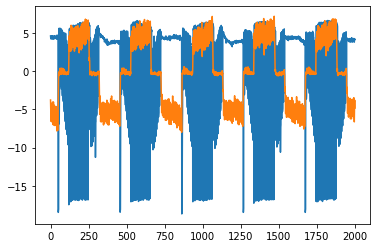

bounds?745,775


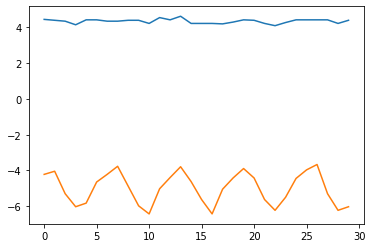

ok?1


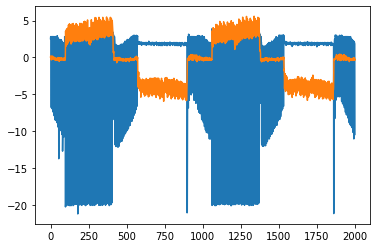

bounds?650,770


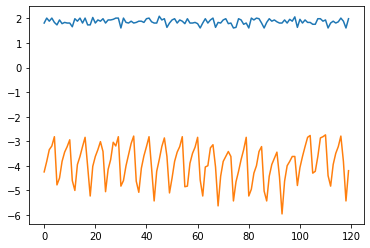

ok?1


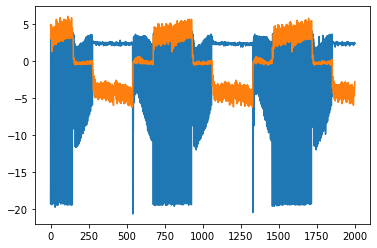

bounds?280,500


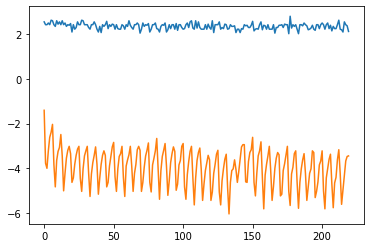

ok?1


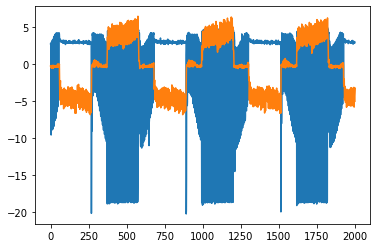

bounds?100,225


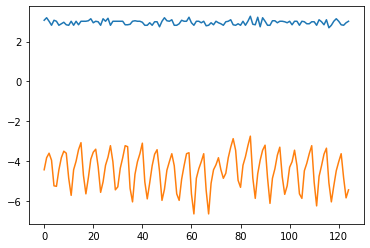

ok?1


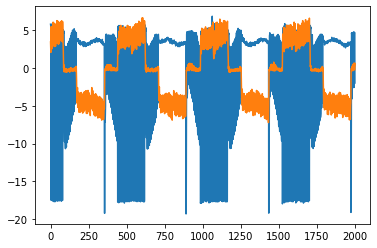

bounds?1280,1350


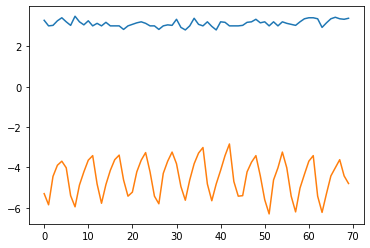

ok?1


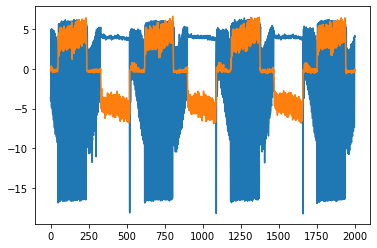

bounds?300,480


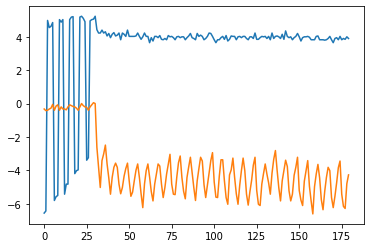

ok?0
bounds?330,480


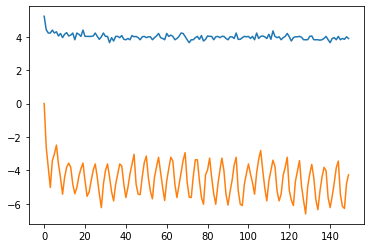

ok?1


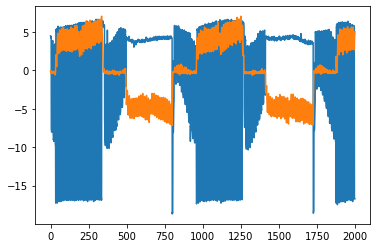

bounds?520,750


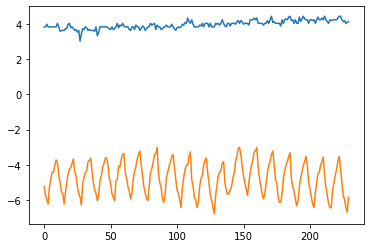

ok?1


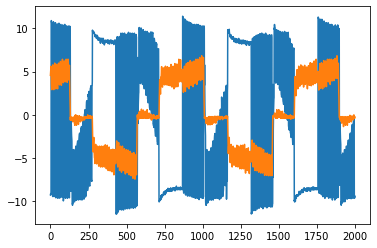

bounds?270,310


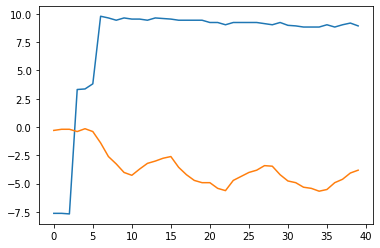

ok?0
bounds?280,310


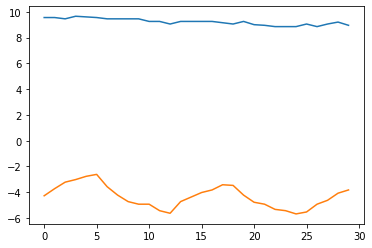

ok?1


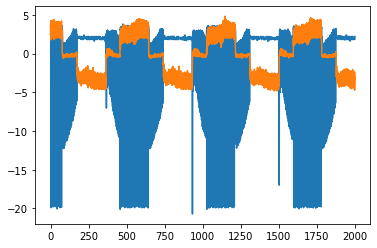

bounds?150,350


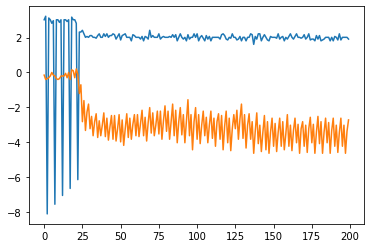

ok?0
bounds?170,350


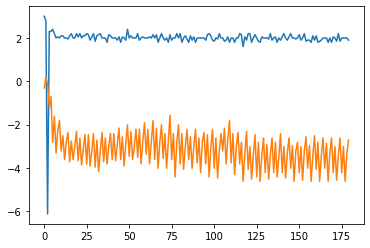

ok?0
bounds?180,350


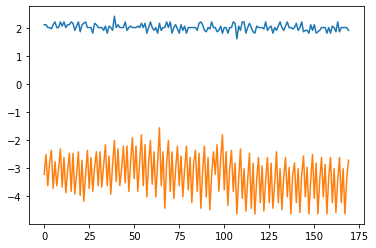

ok?1


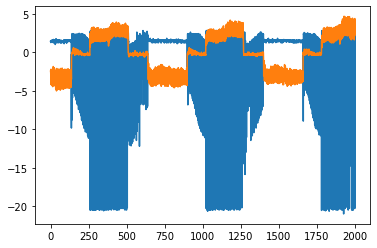

bounds?670,850


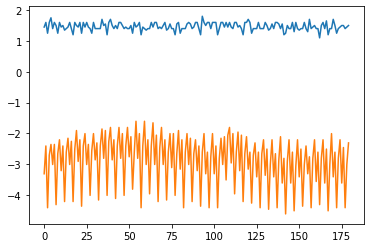

ok?1


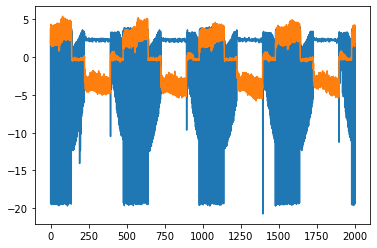

bounds?260,360


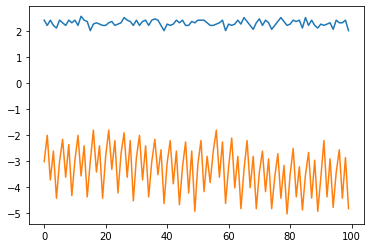

ok?1


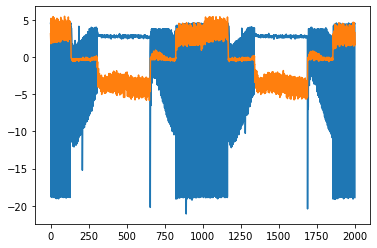

bounds?300,600


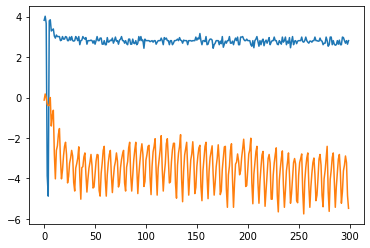

ok?0
bounds?350,600


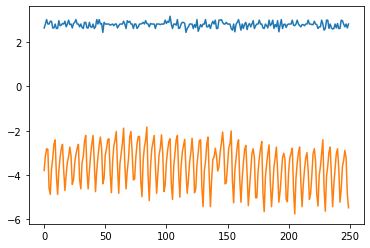

ok?1


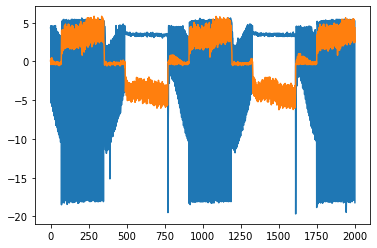

bounds?515,730


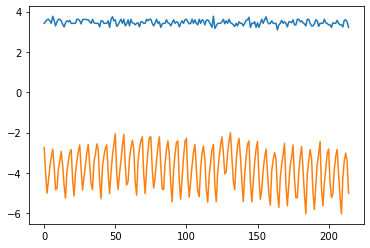

ok?1


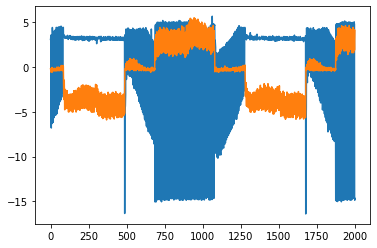

bounds?125,375


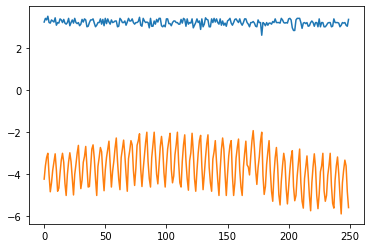

ok?1


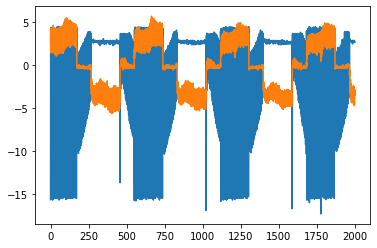

bounds?265,375


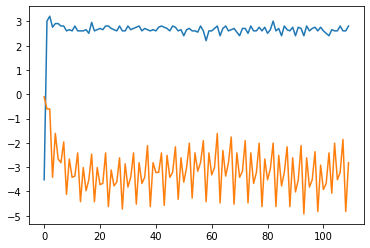

ok?0
bounds?285,375


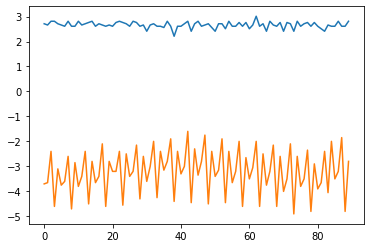

ok?1


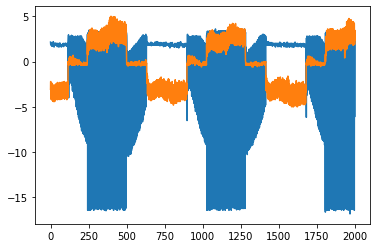

bounds?670,820


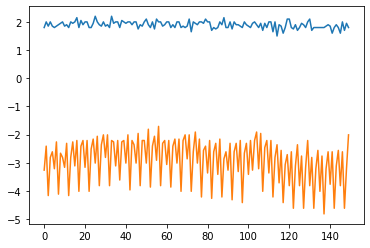

ok?1


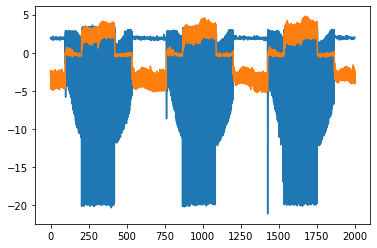

bounds?560,710


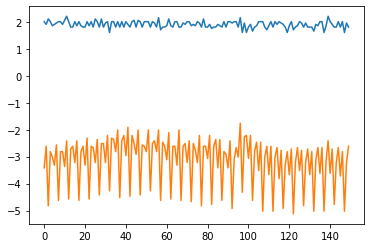

ok?1


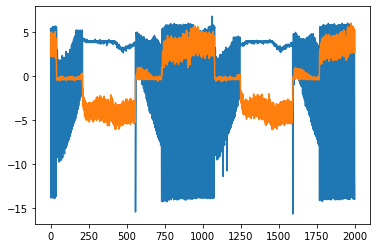

bounds?260,500


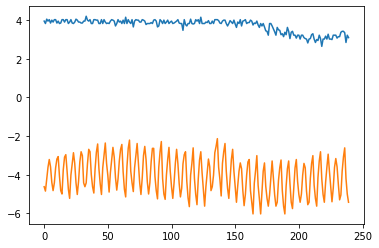

ok?1


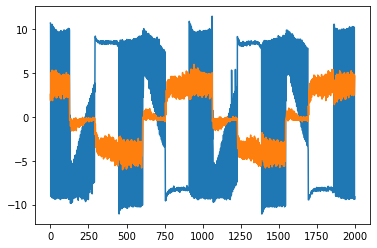

bounds?280,350


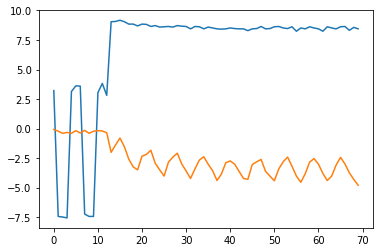

ok?0
bounds?295,360


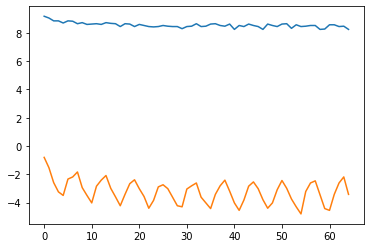

ok?1


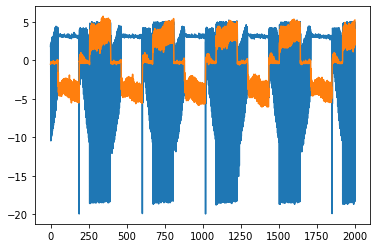

bounds?470,530


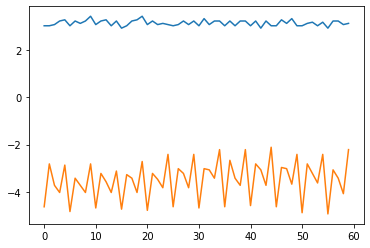

ok?1


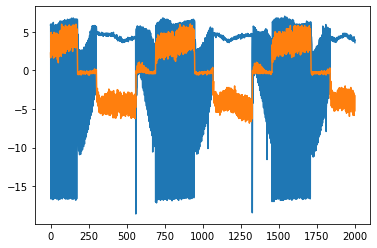

bounds?290,505


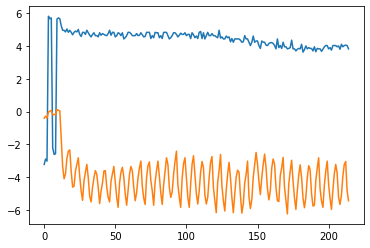

ok?0
bounds?295,505


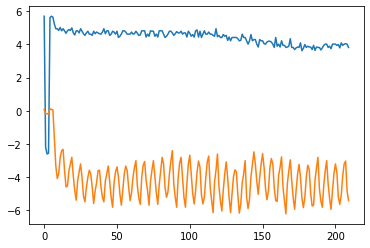

ok?0
bounds?305,505


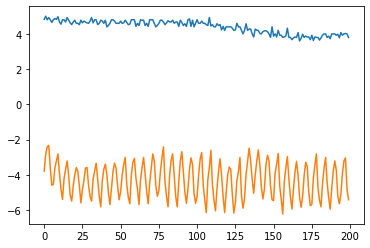

ok?1


In [57]:
'''
ISOLATING CURRENT AND VOLTAGE WHEN H BRIDGE ON
afLabel = ['time','ESC V', 'Back EMF L2G V', 'Phase Current A']
afBounds = {}
k=0
while 'af' in csvs[k]:
    plt.plot(csvArrs[csvs[k]][:,1])
    plt.plot(csvArrs[csvs[k]][:,3])
    
    plt.show()
    ok = False
    while not ok:
        bnds = input('bounds?')
        bounds = np.array(bnds.split(',')).astype(int)
        plt.plot(csvArrs[csvs[k]][bounds[0]:bounds[1],1])
        plt.plot(csvArrs[csvs[k]][bounds[0]:bounds[1],3])
        plt.show()
        ok = bool(int(input('ok?')))
    afBounds[csvs[k]] = bounds
    k+=1
'''

In [61]:
#afBndsDf = pd.DataFrame(afBounds)
#afBndsDf.to_csv('afBounds.csv')

In [80]:
afLabel = ['time','ESC V', 'Back EMF L2G V', 'Phase Current A']
afEscRs = {}
afEscPs = {}
k=0
while 'af' in csvs[k]:
    lims = afBounds[csvs[k]]
    escV = csvArrs[csvs[k]][lims[0]:lims[1],1]
    escI = csvArrs[csvs[k]][lims[0]:lims[1],3]
    res = np.abs(escV/(escI+1e-4))
    afEscRs[csvs[k]] = np.mean(res)
    afEscPs[csvs[k]] = np.abs(np.mean(escV*escI))
    k+=1

In [181]:
afSupplyRem = {}
for i in range(27):
    key = 'af'+str(2*i+1)+'.csv'
    lost = afEscPs[key]
    supplied = pwrSupply[i+1,5].astype(float)
    rem = supplied-lost
    afSupplyRem[key] = rem

In [5]:
statorR = .15

In [6]:
def rotorR(rotorCur):
    return 43*rotorCur**-1

In [182]:
afSupplyRem

{'af1.csv': 13.193048740242567,
 'af3.csv': 23.603368748221257,
 'af5.csv': 12.011736301342204,
 'af7.csv': 19.089954337284787,
 'af9.csv': 23.618734377953395,
 'af11.csv': 19.37335144467816,
 'af13.csv': 24.53651865116963,
 'af15.csv': 14.79049383050106,
 'af17.csv': 17.651407514014586,
 'af19.csv': 19.205379469276718,
 'af21.csv': 27.078640254753246,
 'af23.csv': 13.741541218858739,
 'af25.csv': 16.516919559770358,
 'af27.csv': 19.622217164414536,
 'af29.csv': 23.015373309577857,
 'af31.csv': 26.089062385396957,
 'af33.csv': 6.4140465972432565,
 'af35.csv': 13.094456248385823,
 'af37.csv': 8.16199189481573,
 'af39.csv': 14.388731660690562,
 'af41.csv': 16.038667068861947,
 'af43.csv': 19.997588052054827,
 'af45.csv': 16.509039749871263,
 'af47.csv': 14.81509269562177,
 'af49.csv': 9.476234436327887,
 'af51.csv': 18.423315706046985,
 'af53.csv': 10.905973868675808}

In [83]:
#Notes:
#1 is volts accross ESC
#2 is line to line back emf line to ground on D
#3 is current to D phase from ESC

In [89]:
pwrSupply = np.load('MotorPowerSupply.npy')

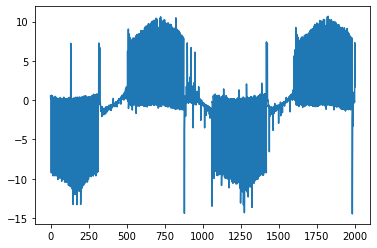

bounds?720,1810


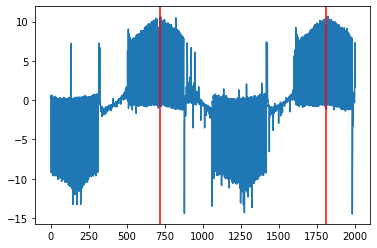

ok?1
0.0109 secs per wave


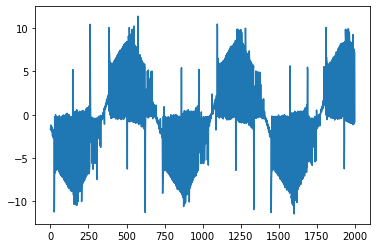

bounds?525,1240


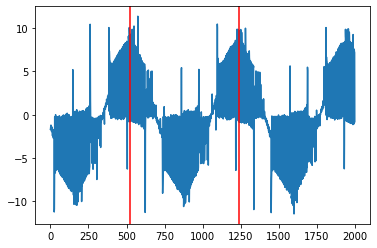

ok?1
0.00715 secs per wave


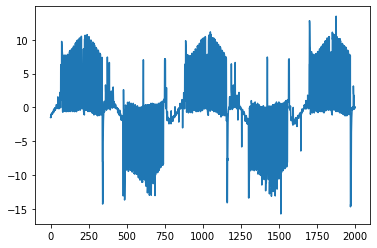

bounds?230,1035


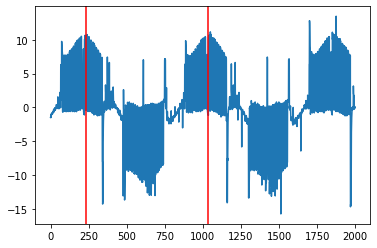

ok?1
0.004025 secs per wave


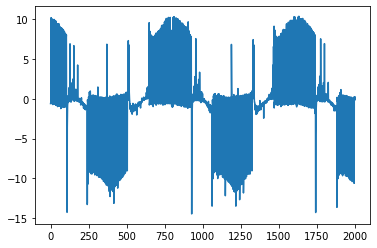

bounds?790,1620


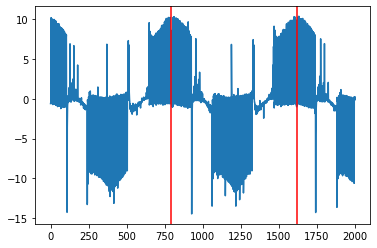

ok?1
0.0083 secs per wave


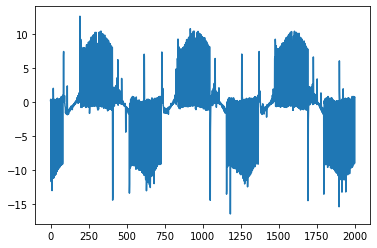

bounds?920,1600


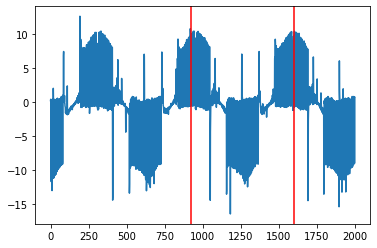

ok?0
bounds?940,1595


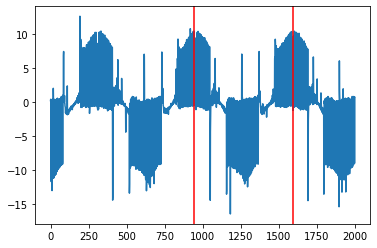

ok?1
0.006549999999999999 secs per wave


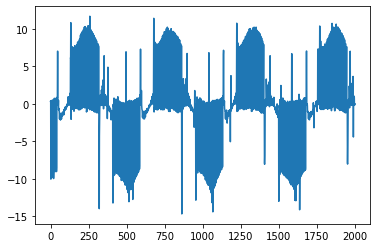

bounds?750,1310


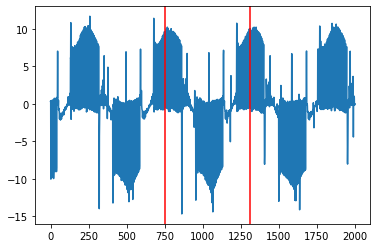

ok?0
bounds?760,1325


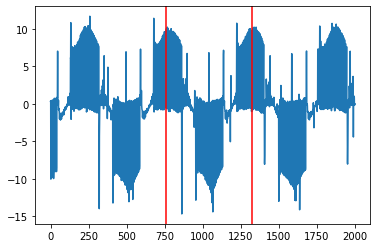

ok?1
0.0056500000000000005 secs per wave


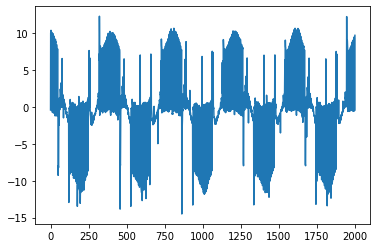

bounds?300,780


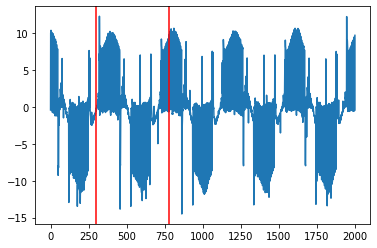

ok?0
bounds?400,800


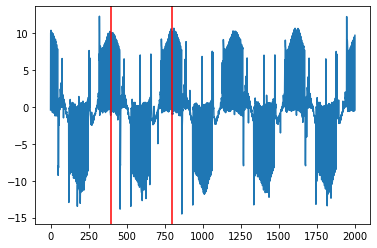

ok?1
0.004 secs per wave


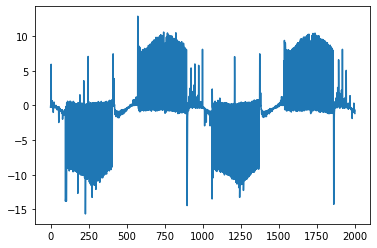

bounds?750,1650


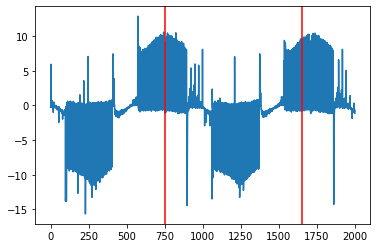

ok?0
bounds?750,1690


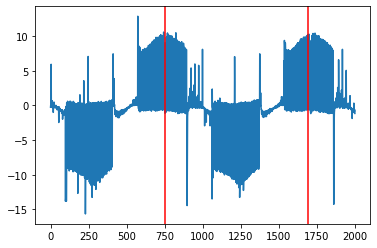

ok?0
bounds?750,1705


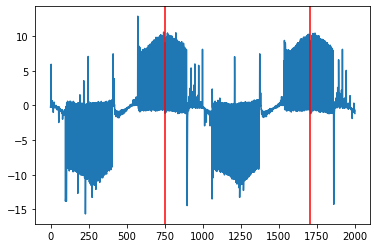

ok?1
0.00955 secs per wave


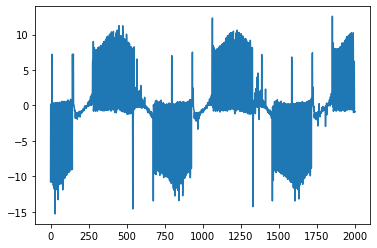

bounds?375,1150


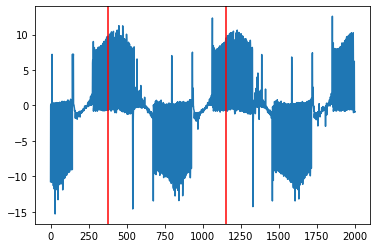

ok?0
bounds?420,1250


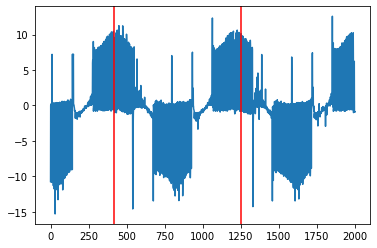

ok?0
bounds?420,1230


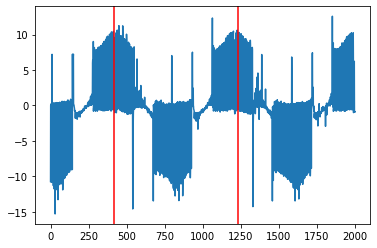

ok?0
bounds?420,1220


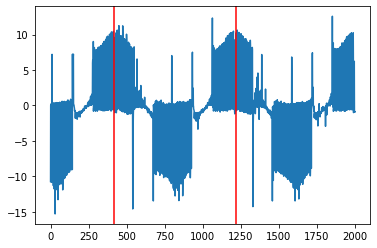

ok?1
0.008 secs per wave


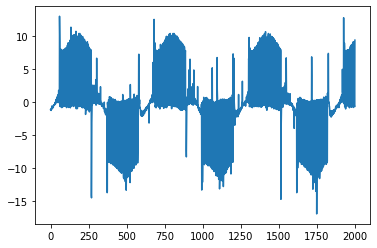

bounds?780,1430


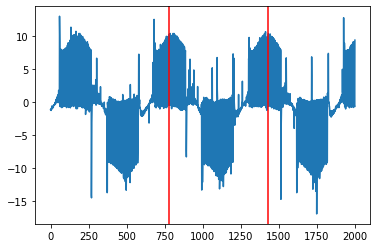

ok?0
bounds?790,1425


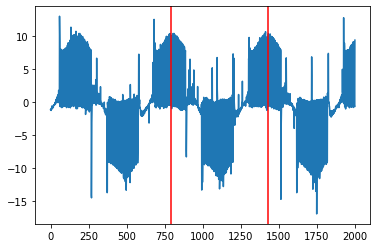

ok?1
0.00635 secs per wave


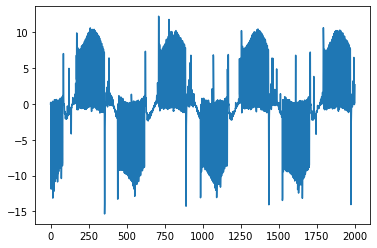

bounds?785,1350


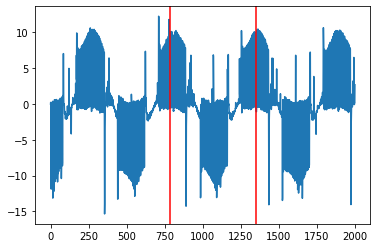

ok?0
bounds?790,1350


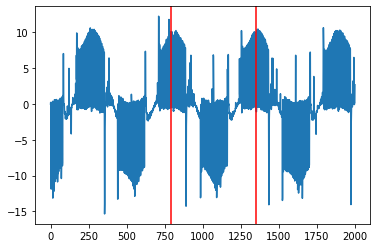

ok?1
0.005600000000000001 secs per wave


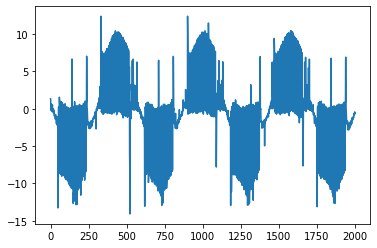

bounds?420,980


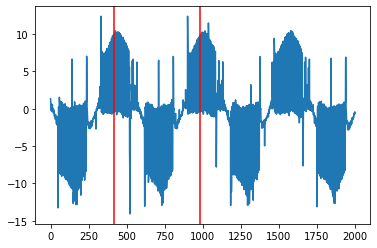

ok?0
bounds?425,990


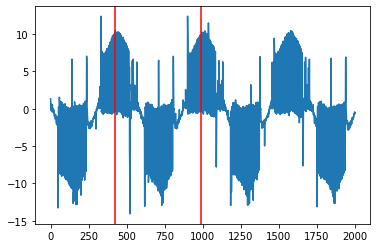

ok?1
0.00565 secs per wave


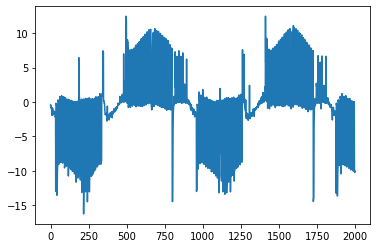

bounds?670,1600


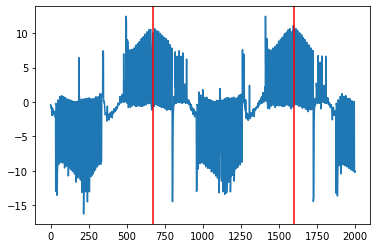

ok?1
0.00465 secs per wave


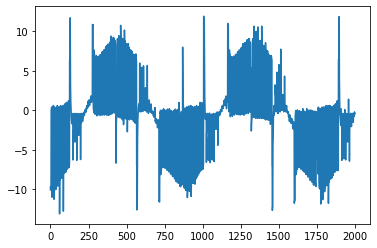

bounds?350,1310


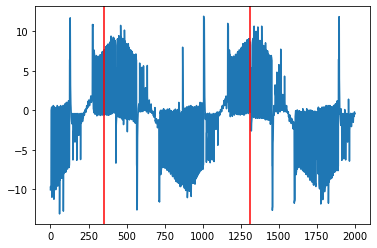

ok?0
bounds?430,1330


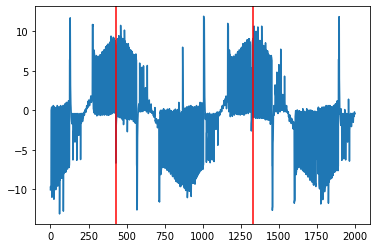

ok?1
0.0045000000000000005 secs per wave


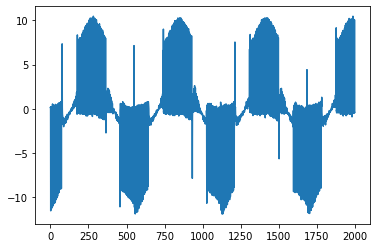

bounds?250,810


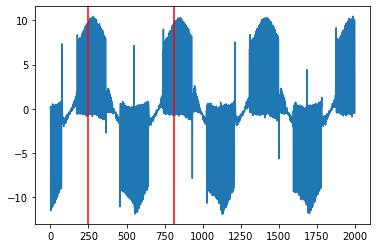

ok?0
bounds?260,825


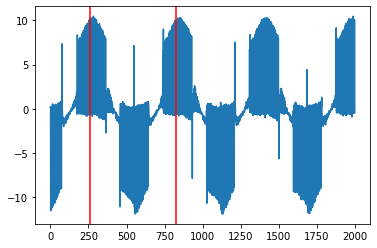

ok?1
0.014125000000000002 secs per wave


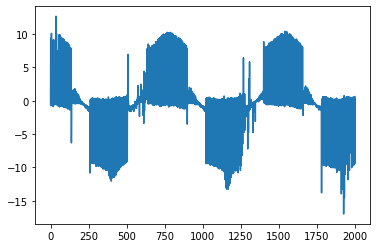

bounds?750,1500


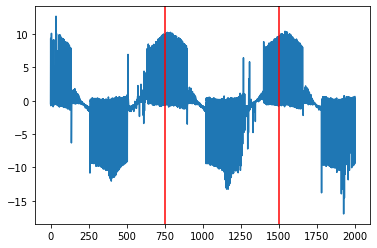

ok?1
0.01875 secs per wave


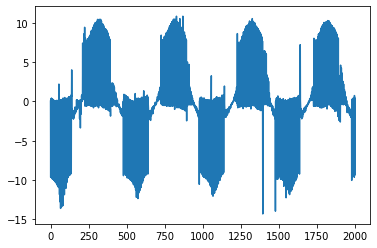

bounds?280,780


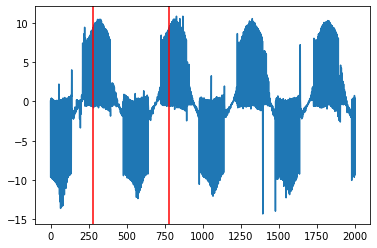

ok?1
0.0125 secs per wave


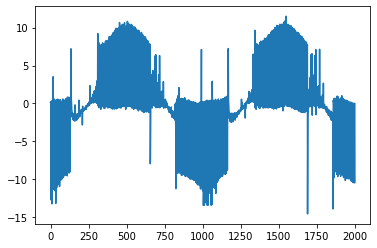

bounds?490,1510


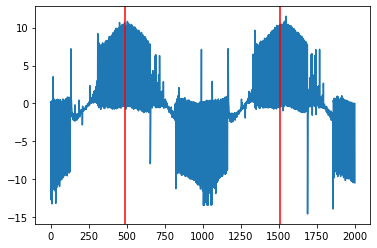

ok?0
bounds?490,1520


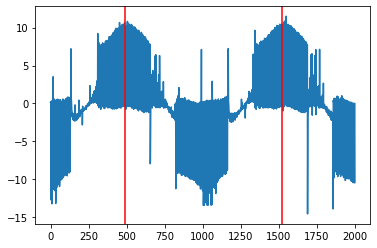

ok?1
0.0103 secs per wave


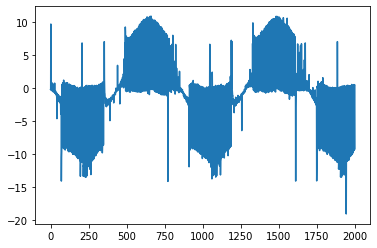

bounds?600,1480


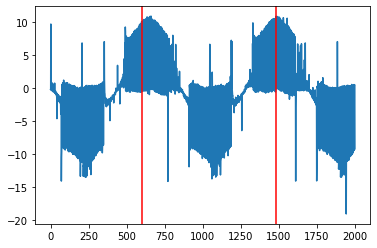

ok?0
bounds?620,1480


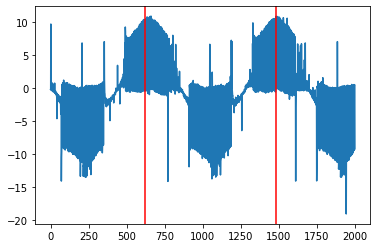

ok?0
bounds?630,1480


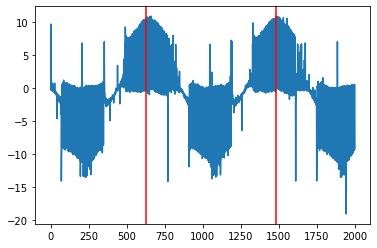

ok?1
0.0085 secs per wave


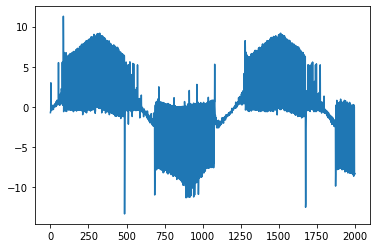

bounds?280,1500


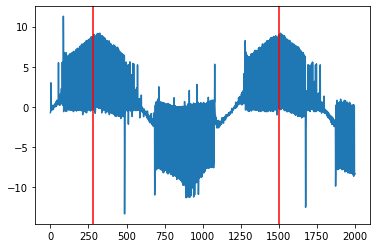

ok?0
bounds?290,1500


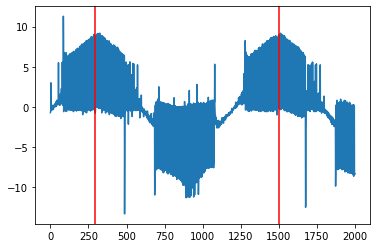

ok?1
0.0121 secs per wave


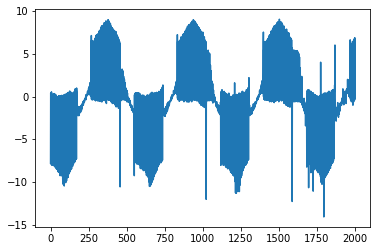

bounds?300,900


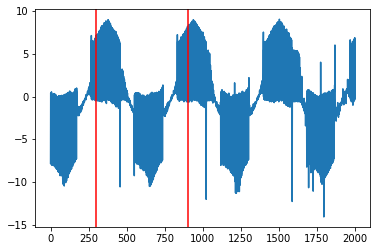

ok?0
bounds?400,950


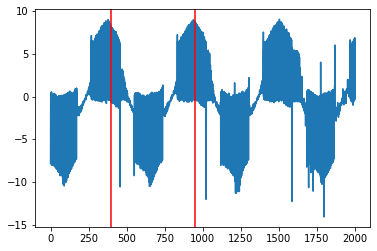

ok?0
bounds?390,950


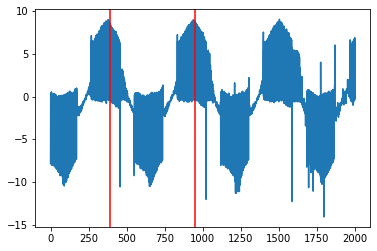

ok?1
0.013999999999999999 secs per wave


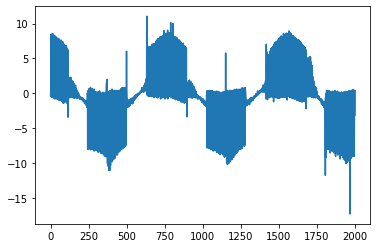

bounds?370,1150


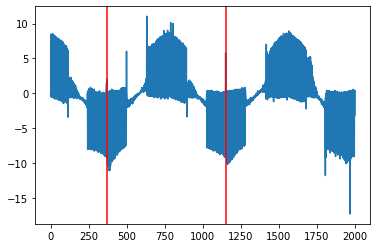

ok?1
0.0195 secs per wave


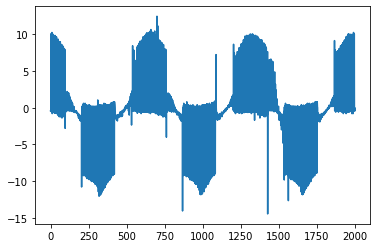

bounds?625,1310


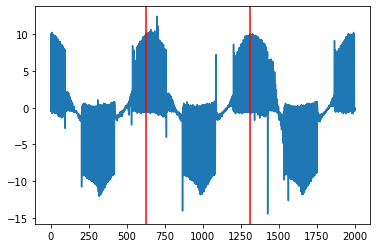

ok?0
bounds?645,1315


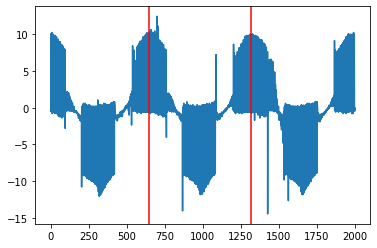

ok?1
0.01675 secs per wave


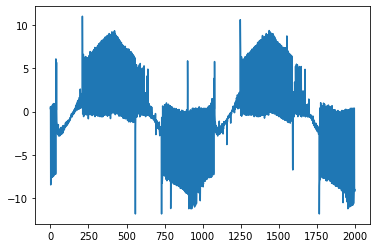

bounds?350,1450


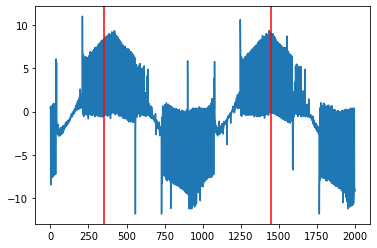

ok?0
bounds?370,1450


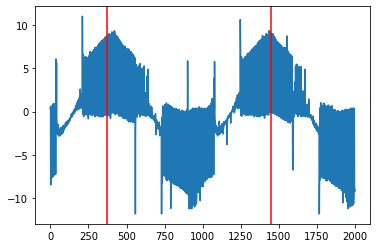

ok?0
bounds?380,1450


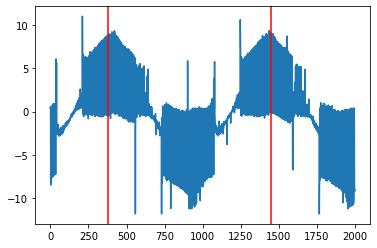

ok?0
bounds?390,1450


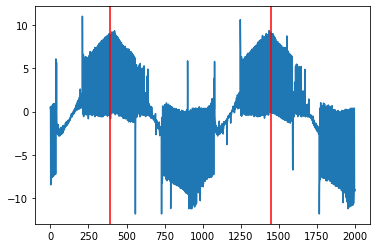

ok?1
0.0106 secs per wave


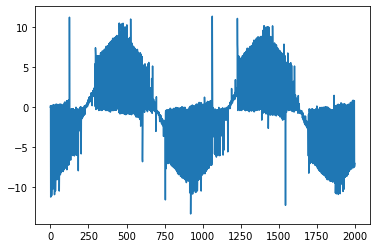

bounds?475,1400


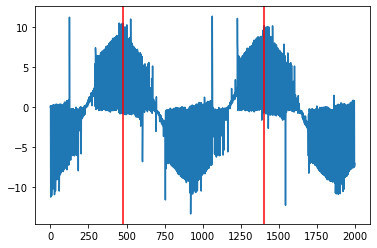

ok?1
0.009250000000000001 secs per wave


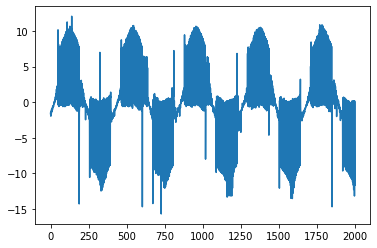

bounds?510,980


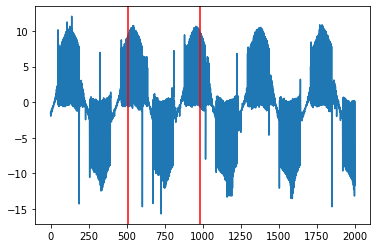

ok?0
bounds?520,965


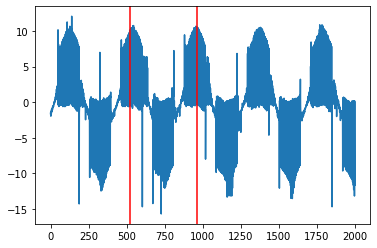

ok?0
bounds?525,965


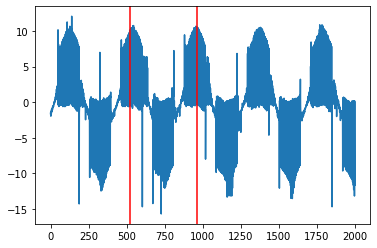

ok?1
0.011 secs per wave


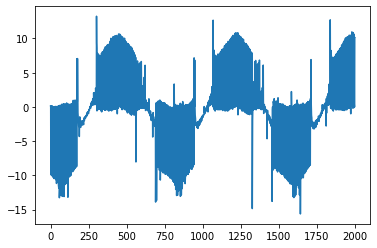

bounds?470,1240


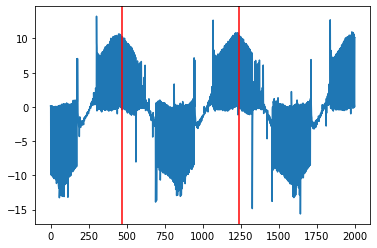

ok?0
bounds?460,1235


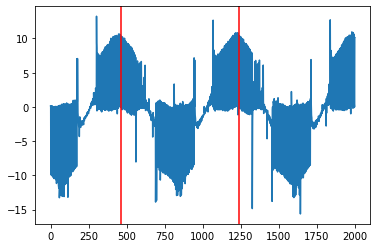

ok?1
0.00775 secs per wave


In [142]:
# # FREQUENCY METHODS
# afLabel = ['time','ESC V', 'Back EMF L2G V', 'Phase Current A']
# emfFreqs = {}
# k=0
# while 'af' in csvs[k]:
#     time,emf = csvArrs[csvs[k]][:,0], csvArrs[csvs[k]][:,2]
#     plt.plot(emf)
#     plt.show()
#     ok = False
#     while not ok:
#         bnds = input('bounds?')
#         bounds = np.array(bnds.split(',')).astype(int)
#         plt.plot(emf)
#         plt.axvline(bounds[0],color='r')
#         plt.axvline(bounds[1],color='r')
#         plt.show()
#         ok = bool(int(input('ok?')))
#     dtime = time[bounds[1]]-time[bounds[0]]
#     print(dtime,'secs per wave')
#     emfFreqs[csvs[k]] = 1/dtime
#     k+=1


In [148]:
emfFreqsDf = pd.DataFrame(emfFreqs, index = np.arange(1))
emfFreqsDf.to_csv('emfFreqs.csv')

In [151]:
freqs = pd.read_csv('emfFreqs.csv')# hz in back EMF

In [167]:
omegas = {}
for key in csvs:
    if 'af' in key:
        omegas[key] = freqs[key].values/6*2*np.pi

In [14]:
omegas = {'af1.csv': np.array([96.07316983]),
 'af11.csv': np.array([146.46119597]),
 'af13.csv': np.array([260.17330465]),
 'af15.csv': np.array([126.16837966]),
 'af17.csv': np.array([159.87748873]),
 'af19.csv': np.array([185.34469933]),
 'af21.csv': np.array([261.7993878]),
 'af23.csv': np.array([109.65419384]),
 'af25.csv': np.array([130.8996939]),
 'af27.csv': np.array([164.91300019]),
 'af29.csv': np.array([186.99956271]),
 'af3.csv': np.array([185.34469933]),
 'af31.csv': np.array([225.20377445]),
 'af33.csv': np.array([232.71056693]),
 'af35.csv': np.array([74.13787973]),
 'af37.csv': np.array([55.85053606]),
 'af39.csv': np.array([83.7758041]),
 'af41.csv': np.array([101.66966516]),
 'af43.csv': np.array([123.19971191]),
 'af45.csv': np.array([86.54525217]),
 'af47.csv': np.array([74.79982509]),
 'af49.csv': np.array([53.70243852]),
 'af5.csv': np.array([62.51925679]),
 'af51.csv': np.array([98.79222181]),
 'af53.csv': np.array([113.21054608]),
 'af7.csv': np.array([95.19977738]),
 'af9.csv': np.array([135.12226467])}

In [169]:
avgSCurr = {}
for key in csvs:
    if 'af' in key:
        avgSCurr[key] = np.mean(csvArrs[key][:-10,-1])

In [183]:
afSOhmLoss = {}
for key in avgSCurr:
    afSOhmLoss[key] = 3 * avgSCurr[key]**2 * statorR

In [192]:
dragPower = {}
for key in afSOhmLoss:
    dragPower[key] = afSupplyRem[key] - afSOhmLoss[key]

In [216]:
sheets = """inv Curr	out 1 V	out 1 cur (A)	curr ^2	power 1 (W)	Rotor R	out 2 v	out 2 cur (A)	power 2 (W)	file
0.8196721311	3.19	1.22	1.4884	3.8918	35.24590164	19.97	0.9	17.973	af5
0.8196721311	3.19	1.22	1.4884	3.8918	35.24590164	19.97	1.5	29.955	af7
0.8196721311	3.19	1.22	1.4884	3.8918	35.24590164	19.5	2.18	42.51	af9
0.8196721311	3.19	1.22	1.4884	3.8918	35.24590164	17.4	2.83	49.242	af11
1.960784314	1.33	0.51	0.2601	0.6783	84.31372549	19.5	2.4	46.8	af13
1.960784314	1.33	0.51	0.2601	0.6783	84.31372549	19.96	1.15	22.954	af15
1.960784314	1.33	0.51	0.2601	0.6783	84.31372549	19.96	1.45	28.942	af17
1.960784314	1.33	0.51	0.2601	0.6783	84.31372549	19.5	1.7	33.15	af19
1.960784314	1.33	0.51	0.2601	0.6783	84.31372549	19.5	2.5	48.75	af21
1.666666667	1.63	0.6	0.36	0.978	71.66666667	19.97	1.05	20.9685	af23
1.666666667	1.63	0.6	0.36	0.978	71.66666667	19.97	1.29	25.7613	af25
1.666666667	1.63	0.6	0.36	0.978	71.66666667	19.97	1.64	32.7508	af27
1.666666667	1.63	0.6	0.36	0.978	71.66666667	19.53	1.9	37.107	af29
1.666666667	1.63	0.6	0.36	0.978	71.66666667	19.53	2.3	44.919	af31
1.666666667	1.63	0.6	0.36	0.978	71.66666667	16.53	2.8	46.284	af33
0.9433962264	2.84	1.07	1.1449	3.0388	40.56603774	19.97	0.98	19.5706	af35
0.9345794393	2.84	1.07	1.1449	3.0388	40.18691589	19.97	0.62	12.3814	af37
0.9345794393	2.84	1.07	1.1449	3.0388	40.18691589	19.97	1.1	21.967	af39
0.9345794393	2.84	1.07	1.1449	3.0388	40.18691589	19.97	1.3	25.961	af41
0.9345794393	2.84	1.07	1.1449	3.0388	40.18691589	19.97	1.65	32.9505	af43
0.6896551724	3.94	1.45	2.1025	5.713	29.65517241	16.7	1.7	28.39	af45
0.6896551724	3.94	1.45	2.1025	5.713	29.65517241	16.7	1.4	23.38	af47
0.6896551724	3.94	1.45	2.1025	5.713	29.65517241	16.7	0.9	15.03	af49
0.6896551724	3.94	1.45	2.1025	5.713	29.65517241	16.7	2	33.4	af51
0.6896551724	3.94	1.45	2.1025	5.713	29.65517241	16.7	2.3	38.41	af53"""
lines = sheets.split('\n')
sheetsLst = []
for row in lines:
    sheetsLst.append(row.split('\t'))
sheetsArr = np.array(sheetsLst)
sheetsArr[1:,2]
supplyRCurr = {}
for i in range(1,len(sheetsArr[:,0])):
    key = (sheetsArr[i,-1]+str('.csv'))
    curr =sheetsArr[i,2].astype(float)
    if curr not in supplyRCurr:
        supplyRCurr[curr]=[]
    supplyRCurr[curr].append(key)
    

In [217]:
supplyRCurr

{1.22: ['af5.csv', 'af7.csv', 'af9.csv', 'af11.csv'],
 0.51: ['af13.csv', 'af15.csv', 'af17.csv', 'af19.csv', 'af21.csv'],
 0.6: ['af23.csv', 'af25.csv', 'af27.csv', 'af29.csv', 'af31.csv', 'af33.csv'],
 1.07: ['af35.csv', 'af37.csv', 'af39.csv', 'af41.csv', 'af43.csv'],
 1.45: ['af45.csv', 'af47.csv', 'af49.csv', 'af51.csv', 'af53.csv']}

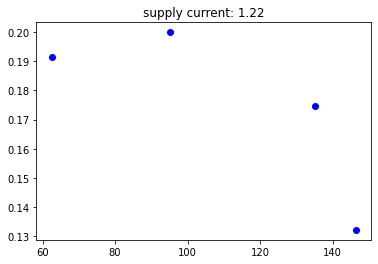

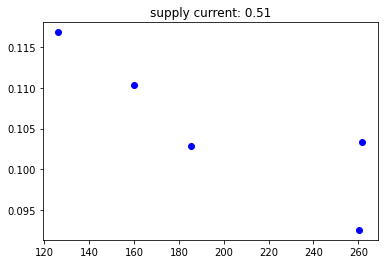

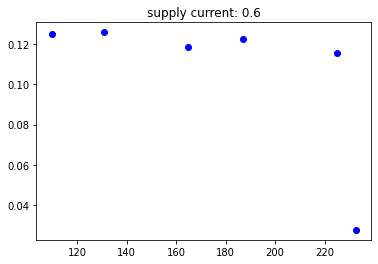

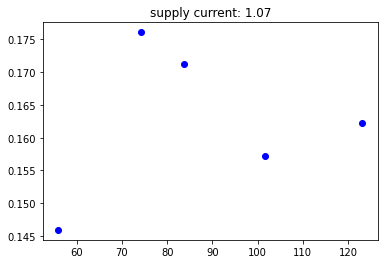

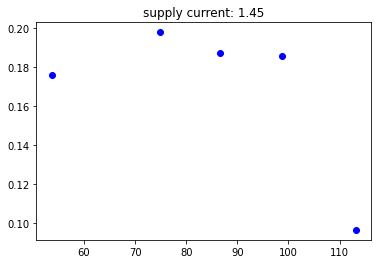

In [222]:
PbyWs= {}
ws = {}
dragCoeffs = {}
for curr in supplyRCurr:
    PbyWs[curr] = []
    ws[curr] = []
    for key in supplyRCurr[curr]:
        w = omegas[key][0]
        PbyW = dragPower[key]/w
        plt.scatter(w,PbyW,color='blue')
        PbyWs[curr].append(PbyW)
        ws[curr].append(w)
    plt.title('supply current: '+str(curr))
    plt.show()
    dragCoeffs[curr] = np.polyfit(np.array(ws[curr]),np.array(PbyWs[curr]),1)

In [17]:
dragCoeffs = {1.22: np.array([0.00061328,  0.241928  ]),
 0.51: np.array([1.29602800e-04,  1.30949897e-01]),
 0.6: np.array([0.00049365,  0.19230511]),
 1.07: np.array([8.39177665e-05, 1.55164257e-01]),
 1.45: np.array([0.00111577,  0.26404037])}

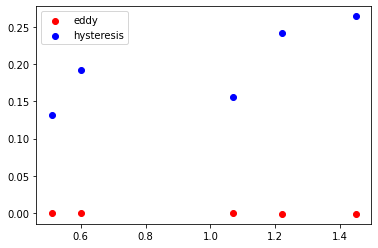

In [258]:
eddies = []
hysts = []
currs = []
for curr in dragCoeffs:
    plt.scatter(curr,dragCoeffs[curr][0],color='r')
    plt.scatter(curr,dragCoeffs[curr][1],color='b')
    eddies.append(dragCoeffs[curr][0])
    currs.append(curr)
    hysts.append(dragCoeffs[curr][1])
plt.legend(['eddy', 'hysteresis'])
plt.show()
eddieVals = np.polyfit(np.array(currs),np.array(eddies),1)
hystVals = np.polyfit(np.array(currs),np.array(hysts),1)

In [259]:
eddieVals,hystVals

(array([-0.00067275,  0.00019889]), array([0.10953018, 0.09063325]))

In [4]:
def getCoeff(vals, curr):
    #eddieVals,hystVals,ktVals
    return vals[0]*curr + vals[1]

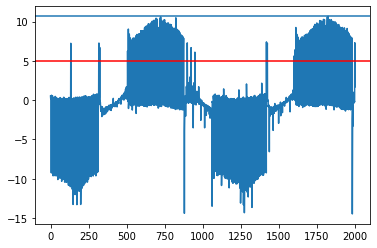

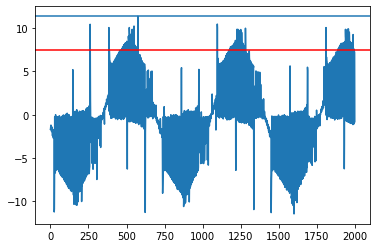

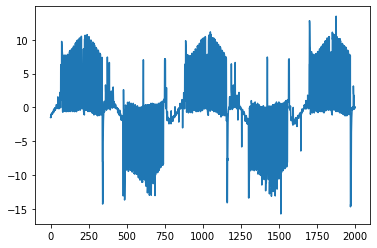

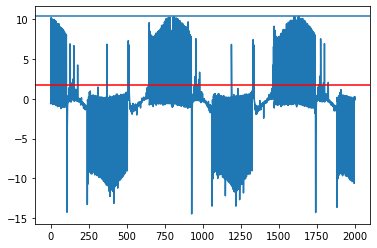

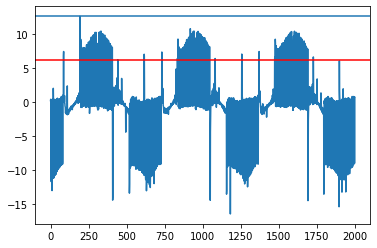

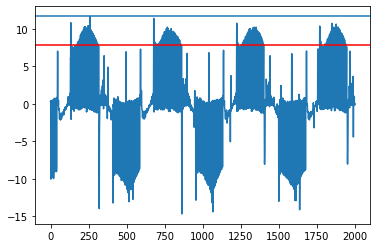

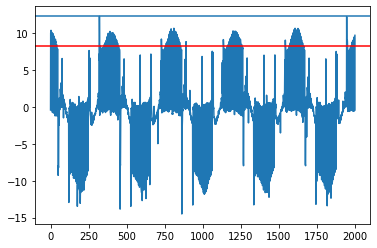

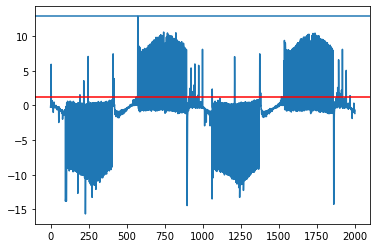

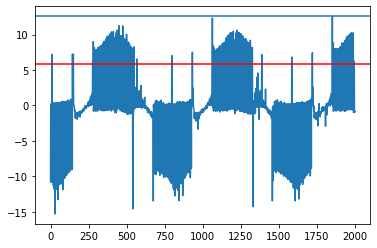

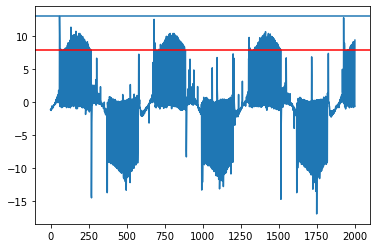

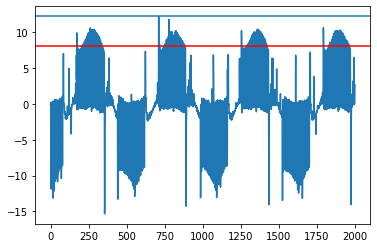

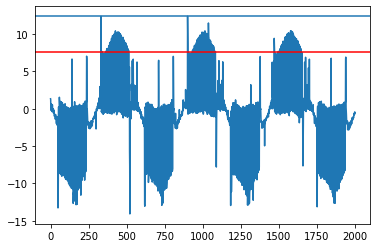

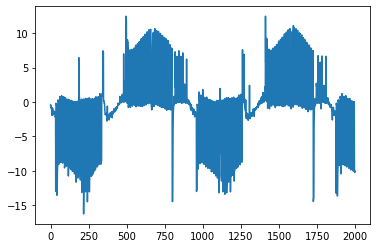

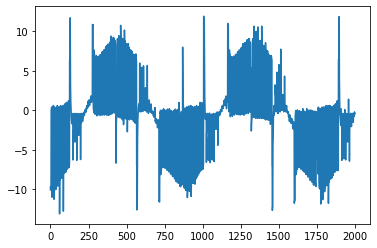

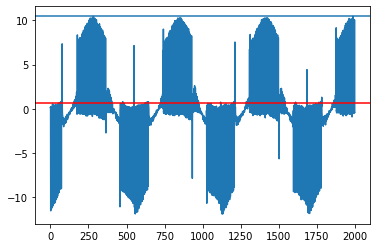

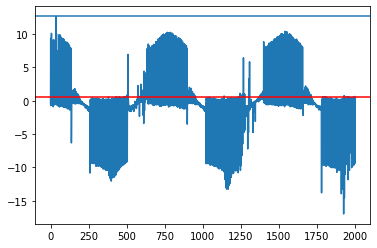

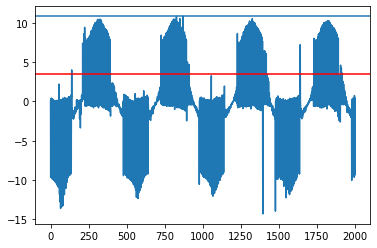

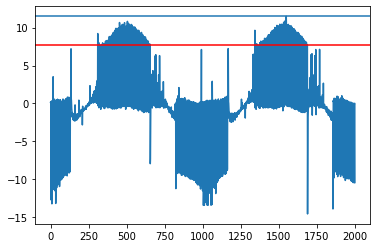

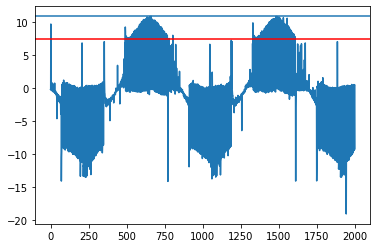

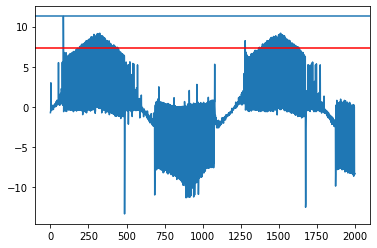

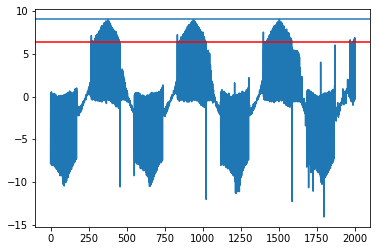

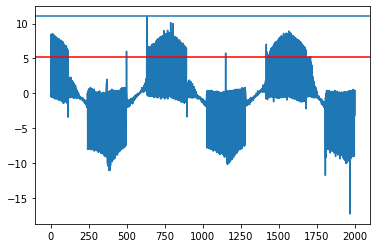

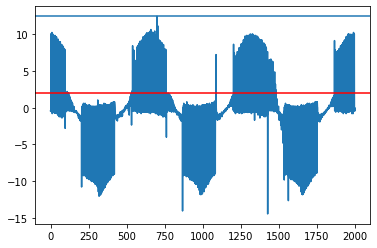

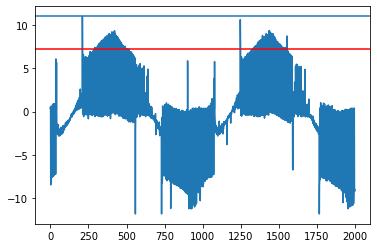

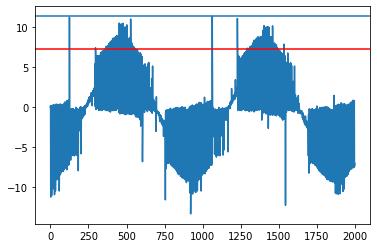

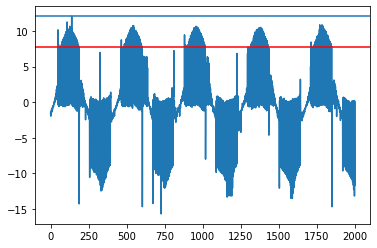

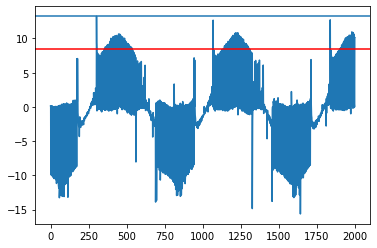

In [231]:
k=0
bEMFpeaks = {}
while 'af' in csvs[k]:
    emf = csvArrs[csvs[k]][:,2]
    plt.plot(emf)
    plt.axhline(np.max(emf))
    per = np.percentile(emf,90)
    plt.axhline(per,color='r')
    plt.show()
    k+=1

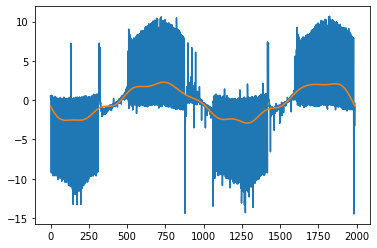

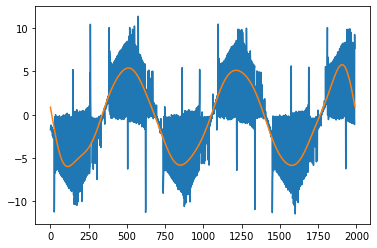

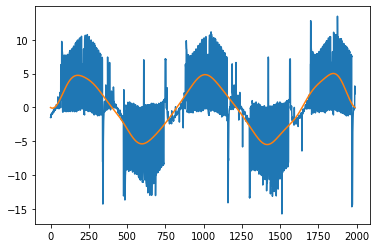

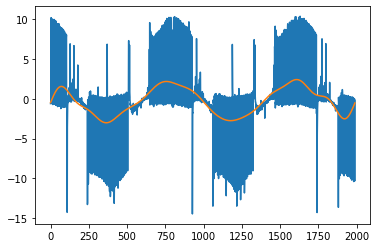

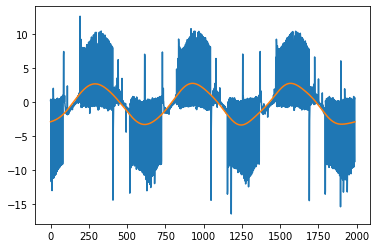

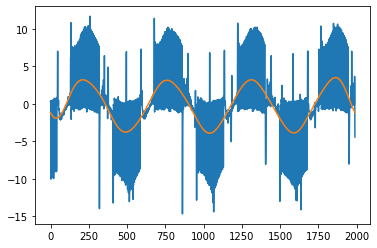

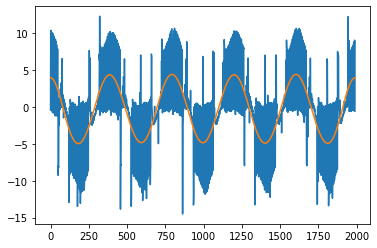

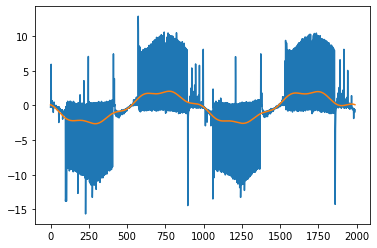

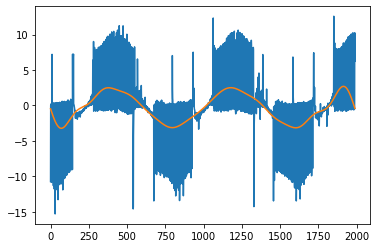

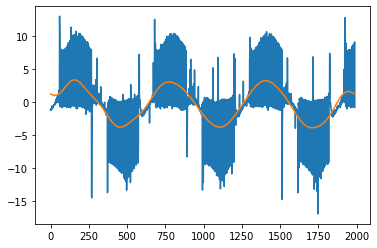

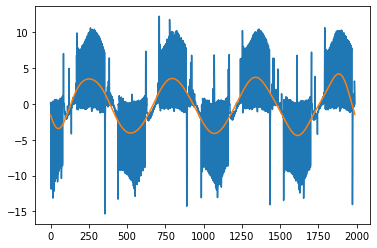

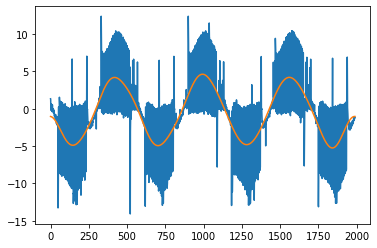

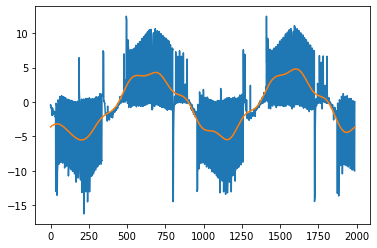

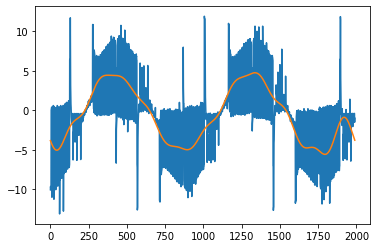

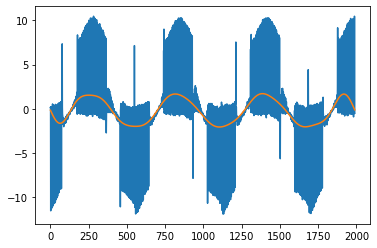

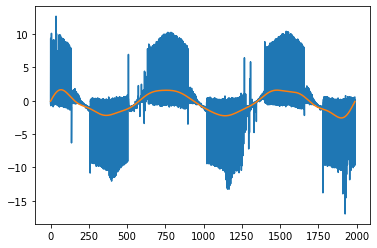

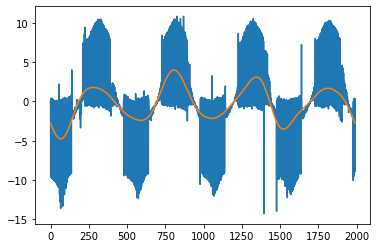

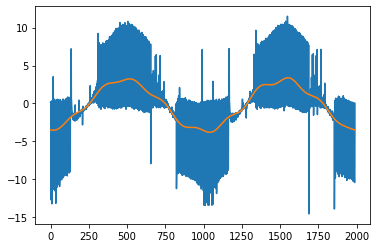

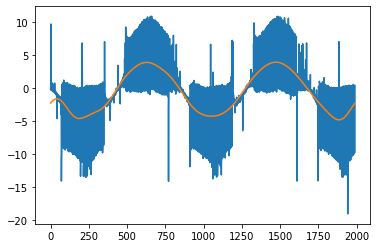

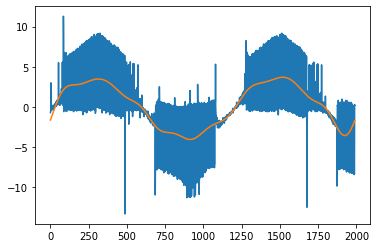

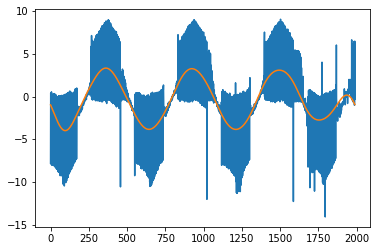

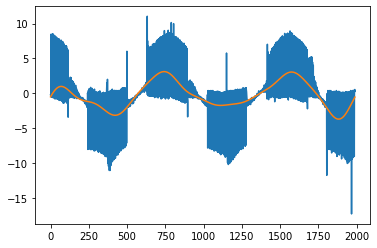

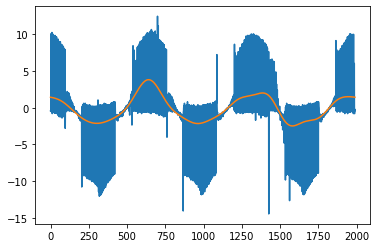

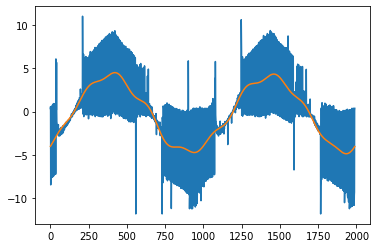

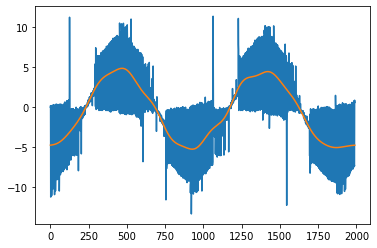

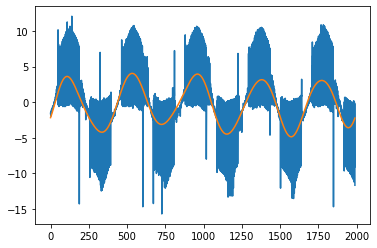

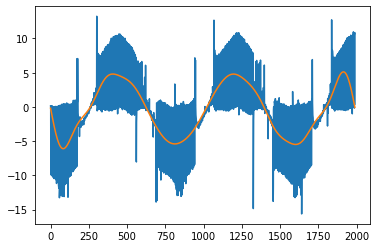

In [241]:
bEMFpeaks = {}
for k in range(27):
    time,emf = csvArrs[csvs[k]][:-10,0], csvArrs[csvs[k]][:-10,2]
    plt.plot(emf)
    np.argsort(emf)
    ft = np.fft.fft(emf)
    filt = np.zeros_like(emf)
    filt[:11] = 1
    filt[-11:] = 1
    lowpass = np.real(np.fft.ifft(filt*ft))
    plt.plot(lowpass)
    bEMFpeaks[csvs[k]] = np.max(lowpass)
    plt.show()
    np.argsort(lowpass)[-80:]

In [11]:
bEMFpeaks = {'af1.csv': 2.2879988880623907,
 'af11.csv': 5.767105219122734,
 'af13.csv': 5.017679898568105,
 'af15.csv': 2.417440343134256,
 'af17.csv': 2.746264029777378,
 'af19.csv': 3.5187074682269706,
 'af21.csv': 4.412449235581169,
 'af23.csv': 2.0470090002452266,
 'af25.csv': 2.6967027807769495,
 'af27.csv': 3.4280811205767074,
 'af29.csv': 4.210822279469609,
 'af3.csv': 4.61967700072438,
 'af31.csv': 4.796464110622898,
 'af33.csv': 4.758423499895573,
 'af35.csv': 1.7166267431153077,
 'af37.csv': 1.6407977284183617,
 'af39.csv': 4.011115614366922,
 'af41.csv': 3.387096765342648,
 'af43.csv': 3.93027104990152,
 'af45.csv': 3.687608141671094,
 'af47.csv': 3.3337579801844854,
 'af49.csv': 3.119969522793943,
 'af5.csv': 3.817395936797859,
 'af51.csv': 4.5208757892587,
 'af53.csv': 4.868362697760854,
 'af7.csv': 4.045165633471426,
 'af9.csv': 5.1207454248946505}

In [19]:
allKts = {}
for key in bEMFpeaks:
    f = omegas[key]*6
    allKts[key] = 3 * bEMFpeaks[key]/(np.sqrt(2) * f)
currKts = {}
for curr in dragCoeffs:
    currKts[curr] = []
    for key in supplyRCurr[curr]:
        f = omegas[key]*6
        currKts[curr].append( 3 * bEMFpeaks[key]/(np.sqrt(2) * f))

NameError: name 'supplyRCurr' is not defined

In [313]:
currKts

{1.22: [array([0.0215878]),
  array([0.01502296]),
  array([0.01339866]),
  array([0.01392164])],
 0.51: [array([0.0068186]),
  array([0.00677423]),
  array([0.00607309]),
  array([0.00671209]),
  array([0.0059589])],
 0.6: [array([0.00660008]),
  array([0.00728366]),
  array([0.00734939]),
  array([0.00796125]),
  array([0.0075301]),
  array([0.0072294])],
 1.07: [array([0.00818636]),
  array([0.01038682]),
  array([0.01692784]),
  array([0.01177853]),
  array([0.01127893])],
 1.45: [array([0.01506456]),
  array([0.01575754]),
  array([0.02054052]),
  array([0.01617912]),
  array([0.01520376])]}

In [298]:
kCurrs = []
kts = []
for curr in currKts:
    print('torque =', curr*np.mean(currKts[curr]))
    kCurrs.append(curr)
    kts.append(np.mean(currKts[curr]))
ktVals = np.polyfit(np.array(kCurrs),np.array(kts),1)
ktVals

torque = 0.01949897049990112
torque = 0.003298366065409357
torque = 0.004395387311188327
torque = 0.012531515309332041
torque = 0.023996195079514795


array([0.01139844, 0.00055083])

In [20]:
statorR = .15
def pGap(k,ist,w):
    return k*ist*w

def pDrag(hyst,eddy,w):
    return w*hyst + np.abs(w**2 * eddy)

def pOhm(ir,rr,ist,rst=statorR):
    return ir**2 *rr + 3*ist**2 *rst

def eff(k,w,ir,rr,ist,hyst,eddy, motor=True,rst=statorR,):
    gap, drag, ohm = pGap(k,ist,w) ,pDrag(hyst,eddy,w), pOhm(ir,rr,ist,rst)
    if motor:
        return (gap - drag)/(gap + ohm)
    else:
        return (gap - ohm)/(gap + drag)

- We'll vary supply rotor current between .5 and 1.5 A
- we'll vary torque from .003 to .025 Nm
- we'll vary angular speed (radians) from 50 to 250 rads/s

In [9]:
eddieVals, hystVals = np.array([0.00067275,  0.00019889]), np.array([0.10953018, 0.09063325])

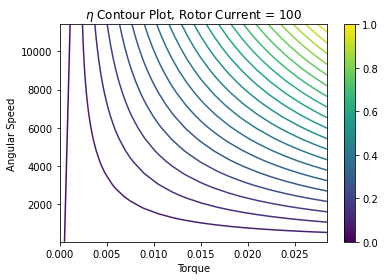

In [32]:
tbnds = (0, .03)
spdbnds = (50,12000)

h = 0.00052#; # hysteresis torque (Nm) 
e =  5.28e-08
curr = 100
k = .015
from matplotlib.cm import ScalarMappable

ax.figsize=(8,8)

torques = np.arange(tbnds[0],tbnds[1],(tbnds[1]-tbnds[0])/20)
angSpeeds = np.arange(spdbnds[0],spdbnds[1],(spdbnds[1]-spdbnds[0])/20)
[trqs, angws] = np.meshgrid(torques, angSpeeds)
effs122 =eff(k, angws, curr, 10,trqs/k, h, e)

fig, ax = plt.subplots(1, 1)
ax.contour(torques, angSpeeds, effs122, 30)

fig.colorbar(
    ScalarMappable())
ax.set_title('$\eta$ Contour Plot, Rotor Current = '+str(curr))
ax.set_xlabel('Torque')
ax.set_ylabel('Angular Speed')

plt.savefig('betterContour.png')

plt.show()

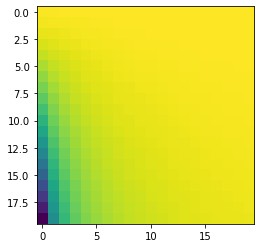

In [291]:
plt.imshow(effs122)

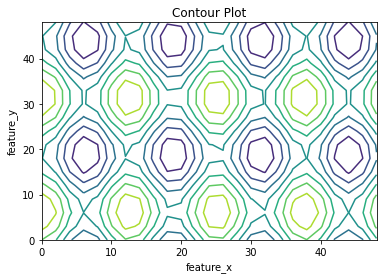

In [262]:
feature_x = np.arange(0, 50, 2)
feature_y = np.arange(0, 50, 3)
[X, Y] = np.meshgrid(feature_x, feature_y)
  
fig, ax = plt.subplots(1, 1)
  
Z = np.cos(X / 2) + np.sin(Y / 4)
# plots contour lines
ax.contour(X, Y, Z)
  
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
  
plt.show()

In [266]:
X

array([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,
        32, 34, 36, 38, 40, 42, 44, 46, 48],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 

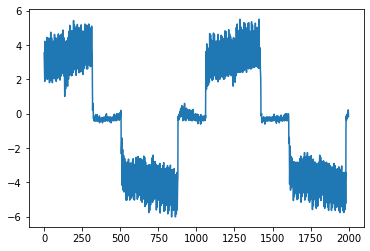

array([ 837,  862,  868, ...,  193, 1412, 1287], dtype=int64)

In [114]:
time,emf = csvArrs[csvs[0]][:,0], csvArrs[csvs[0]][:,3]
plt.plot(emf)
plt.show()
np.argsort(emf)

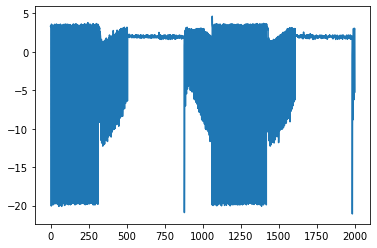

array([1982,  879,   55, ..., 1400,  245, 1062], dtype=int64)

In [115]:
time,emf = csvArrs[csvs[0]][:,0], csvArrs[csvs[0]][:,1]
plt.plot(emf)
plt.show()
np.argsort(emf)

In [29]:
t = np.array(a['x-axis'][1:].values).astype(float)
esc = np.array(a['1'][1:].values).astype(float)
emf = np.array(a['2'][1:].values).astype(float)
phaseC = np.array(a['3'][1:].values).astype(float)

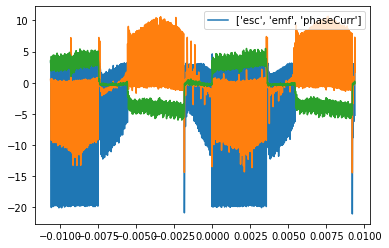

In [31]:
for i in [esc,emf,phaseC]:
    plt.plot(t,i)
plt.legend(['esc emf phaseCurr'.split(' ')])